In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (9, 4)
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titleweight'] = 'bold'


In [2]:
# Basic DF information
df = pd.read_csv('data_set_CLEAN.csv')


nan_count = df.isna().sum().sum()
total_values = df.size
nan_percentage = round((nan_count / total_values) * 100,1)
print (f'the number of row and column is {df.shape}')

print (f'total nb of values in the data set is {total_values}')
print (f'the % of Nan in the whole dataset is {nan_percentage}')
print ('\n')
print('General information on the DF :')
print(df.info())
print(df.dtypes.value_counts())






the number of row and column is (24794, 49)
total nb of values in the data set is 1214906
the % of Nan in the whole dataset is 25.4


General information on the DF :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24794 entries, 0 to 24793
Data columns (total 49 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Locality                                24794 non-null  object 
 1   province                                24794 non-null  object 
 2   region                                  24794 non-null  object 
 3   Postal code                             24794 non-null  int64  
 4   Type of property                        24794 non-null  object 
 5   Subtype                                 24794 non-null  object 
 6   Price (euro)                            24794 non-null  int64  
 7   Construction year                       17787 non-null  float64
 8   New Construction boolean      

<Axes: >

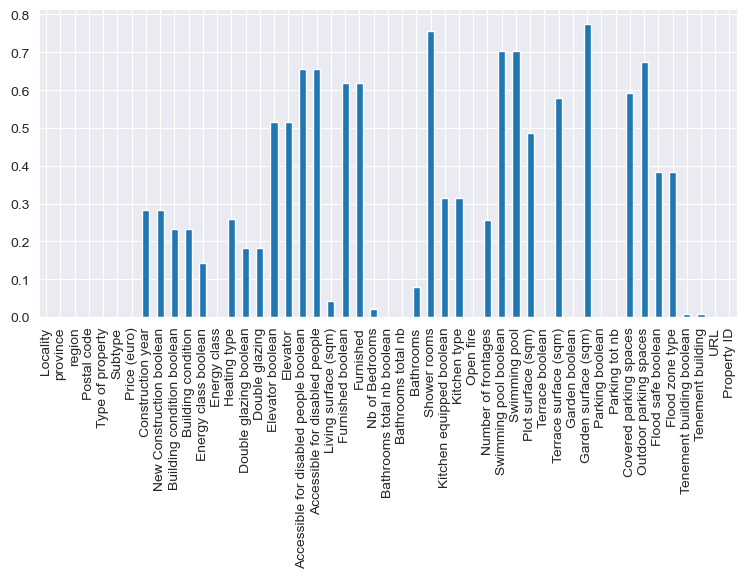

In [3]:
# NaN representation
df.isna().mean().plot(kind='bar')

In [4]:
#get geo loc impact on 
pd.options.display.float_format = '{:,.0f}'.format
print('Mean is:')
mean= round(df['Price (euro)'].mean(),0)
print(mean)
print('Median  is:')
median=round(df['Price (euro)'].median(),0)
print(median)
print('\n')

print('Mean by region is:')
mean_region = df.groupby('region')['Price (euro)'].mean().round(0).sort_values(ascending=False)
print(mean_region)
print('\n')
median_region = (df.groupby('region')['Price (euro)'].median().round(0).sort_values(ascending=False))
print('Median by region is:')
print(median_region)

print('\n')
print('Mean by province is:')
print(df.groupby('province')['Price (euro)'].mean().round(0).sort_values(ascending=False))
print('\n')
print('Median by province is:')
print(df.groupby('province')['Price (euro)'].median().round(0).sort_values(ascending=False))

Mean is:
474856.0
Median  is:
340000.0


Mean by region is:
region
Brussels   618,477
Flanders   481,080
Wallonia   357,419
Name: Price (euro), dtype: float64


Median by region is:
region
Brussels   400,000
Flanders   349,000
Wallonia   277,850
Name: Price (euro), dtype: float64


Mean by province is:
province
West-Vlaanderen                  625,627
Brussels Hoofdstedelijk Gewest   618,477
Waals-Brabant                    568,029
Vlaams-Brabant                   500,149
Antwerpen                        448,966
Oost-Vlaanderen                  419,631
Limburg                          389,095
Luxemburg                        335,001
Namen                            311,161
Luik                             293,227
Henegouwen                       264,064
Name: Price (euro), dtype: float64


Median by province is:
province
Waals-Brabant                    425,000
Vlaams-Brabant                   415,000
Brussels Hoofdstedelijk Gewest   400,000
West-Vlaanderen                  359,000
Oos

c:\Users\SL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(474856.0, 6, 'mean')

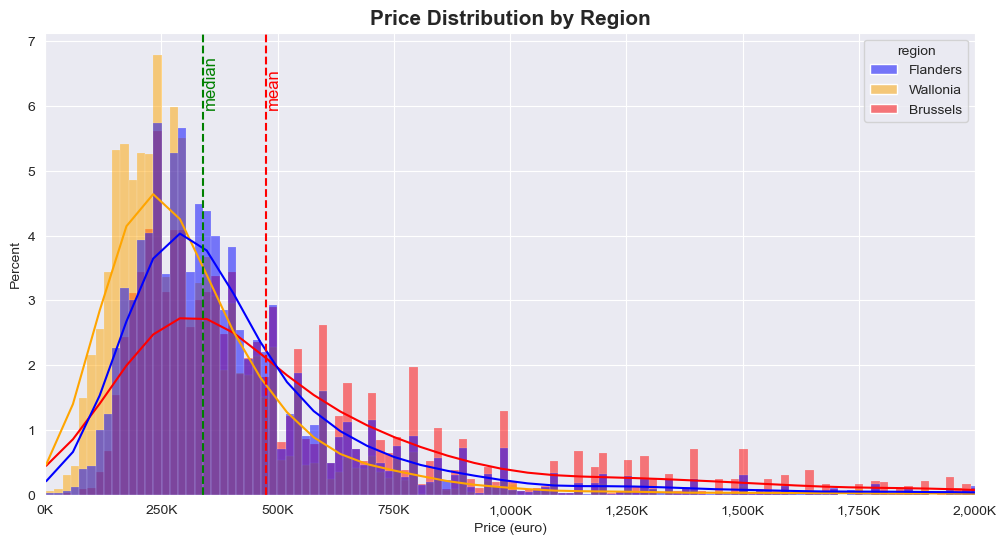

In [5]:
#get a visual rep of the regional price diff 

pd.options.display.float_format = '{:,.0f}'.format
df = pd.read_csv('data_set_CLEAN.csv')

custom_palette = {'Flanders': 'blue', 'Wallonia': 'orange', 'Brussels': 'red'}

plt.figure(figsize=(12, 6))
ax = sns.histplot(data=df, x='Price (euro)', kde=True, hue='region',common_norm=False, stat = 'percent', palette=custom_palette)
# multiple='stack'  if stack preferred 

# put the x axis in keur instead of meur
def format_func(value, tick_number):
    return f'{value/1000:,.0f}K'
ax.xaxis.set_major_formatter(mticker.FuncFormatter(format_func))

# axes rework
plt.xlim(0, 2000000)
plt.xlabel("Price (euro)")
plt.ylabel("Percent")
plt.title("Price Distribution by Region")

# get the country median an mean 
plt.axvline(median, color='green', linestyle='--', label=f'Median: {median:,.0f} euro')
plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:,.0f} euro')
plt.text(median,6,'median',color='green', rotation=90,fontsize = 12 )
plt.text(mean,6,'mean',color='red', rotation=90, fontsize = 12)




NameError: name 'global_means' is not defined

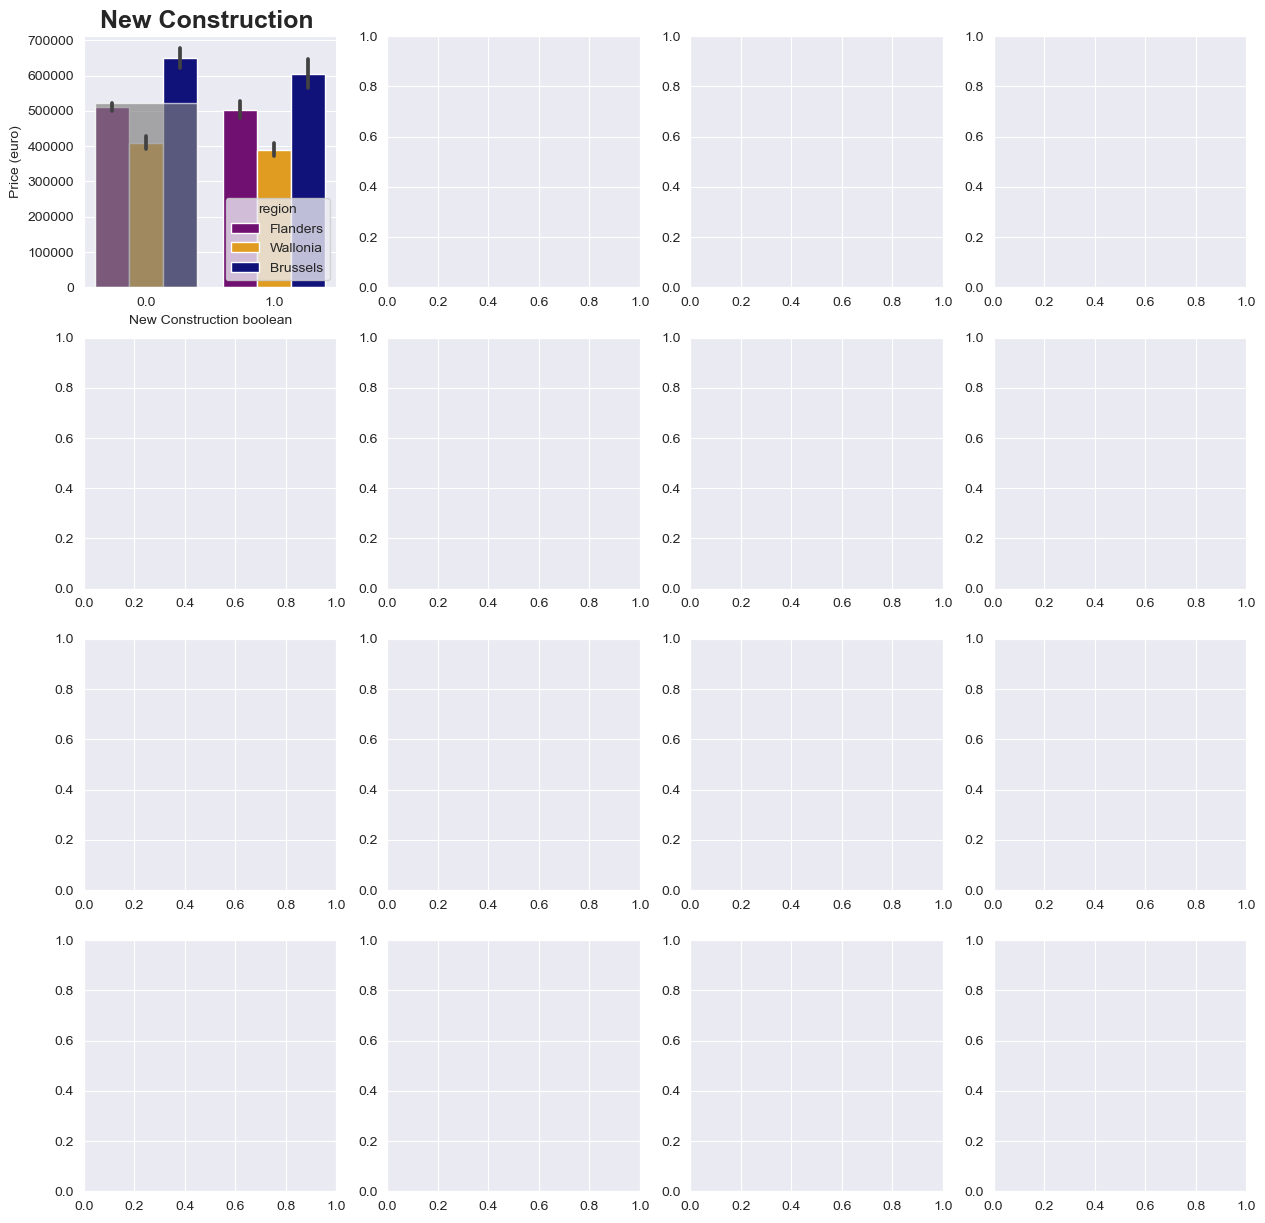

In [6]:
# all properties, all features, impact on price

# Create the figure and axes
fig, axes = plt.subplots(4, 4, figsize=(15, 15))
custom_palette = {'Flanders': 'purple', 'Wallonia': 'orange', 'Brussels': 'darkblue'}

# Flatten the axes array for easy iteration
axes = axes.flatten()


variables = ['New Construction boolean','Energy class boolean', 'Kitchen equipped boolean', 'Building condition boolean', 'Double glazing boolean', 'Elevator boolean', 'Accessible for disabled people boolean', 'Furnished boolean', 'Bathrooms total nb boolean', 'Swimming pool boolean', 'Terrace boolean', 'Garden boolean', 'Open fire', 'Tenement building boolean', 'Parking boolean', 'Flood safe boolean']


# Iterate over each variable and barplot for each subplot
for i, variable in enumerate(variables):
    if i < len(variables):  # Ensure you don't exceed the number of variables
        sns.barplot(x=variable, y='Price (euro)', data=df, hue="region", ax=axes[i], palette=custom_palette)
        axes[i].set_title (f'{variable.rstrip("boolean")}', fontsize=18)


        # Calculate the mean price for each boolean status across all provinces
        boolean_price_means = df.groupby([variable, 'region'])['Price (euro)'].mean().reset_index()
        total_price_means = boolean_price_means.groupby(variable)['Price (euro)'].mean()

        # Plot total mean bars
        for idx, (status, mean_price) in enumerate(total_price_means.items()):
            axes[i].bar(idx, mean_price, color='gray', alpha=0.66)  # Gray bars for total mean
            global_means.append(mean_price)  # Add the mean price to the global means list

        # Add a dummy plot for the global mean to get its handle and label
        global_mean_handle, = axes[i].plot([], [], color='gray', alpha=0.66)

        # Get handles and labels from the subplot legend
        handles, labels = axes[i].get_legend_handles_labels()

        # Add the handle and label for the global mean to the legend
        handles.append(global_mean_handle)
        labels.append('Belgium')

        # Add the legend each subplot
        axes[i].legend(handles, labels, loc='upper left')

#print title
figtext_kwargs = {'x': 0.5, 'y': -0.03 , 'ha': 'center', 'va': 'bottom', 'fontsize': 22, 'fontweight':'bold'}
fig.suptitle('features impact on price - all properties', **figtext_kwargs)


# Adjust layout to prevent overlap of titles
plt.tight_layout()

# Show the plot
plt.show()


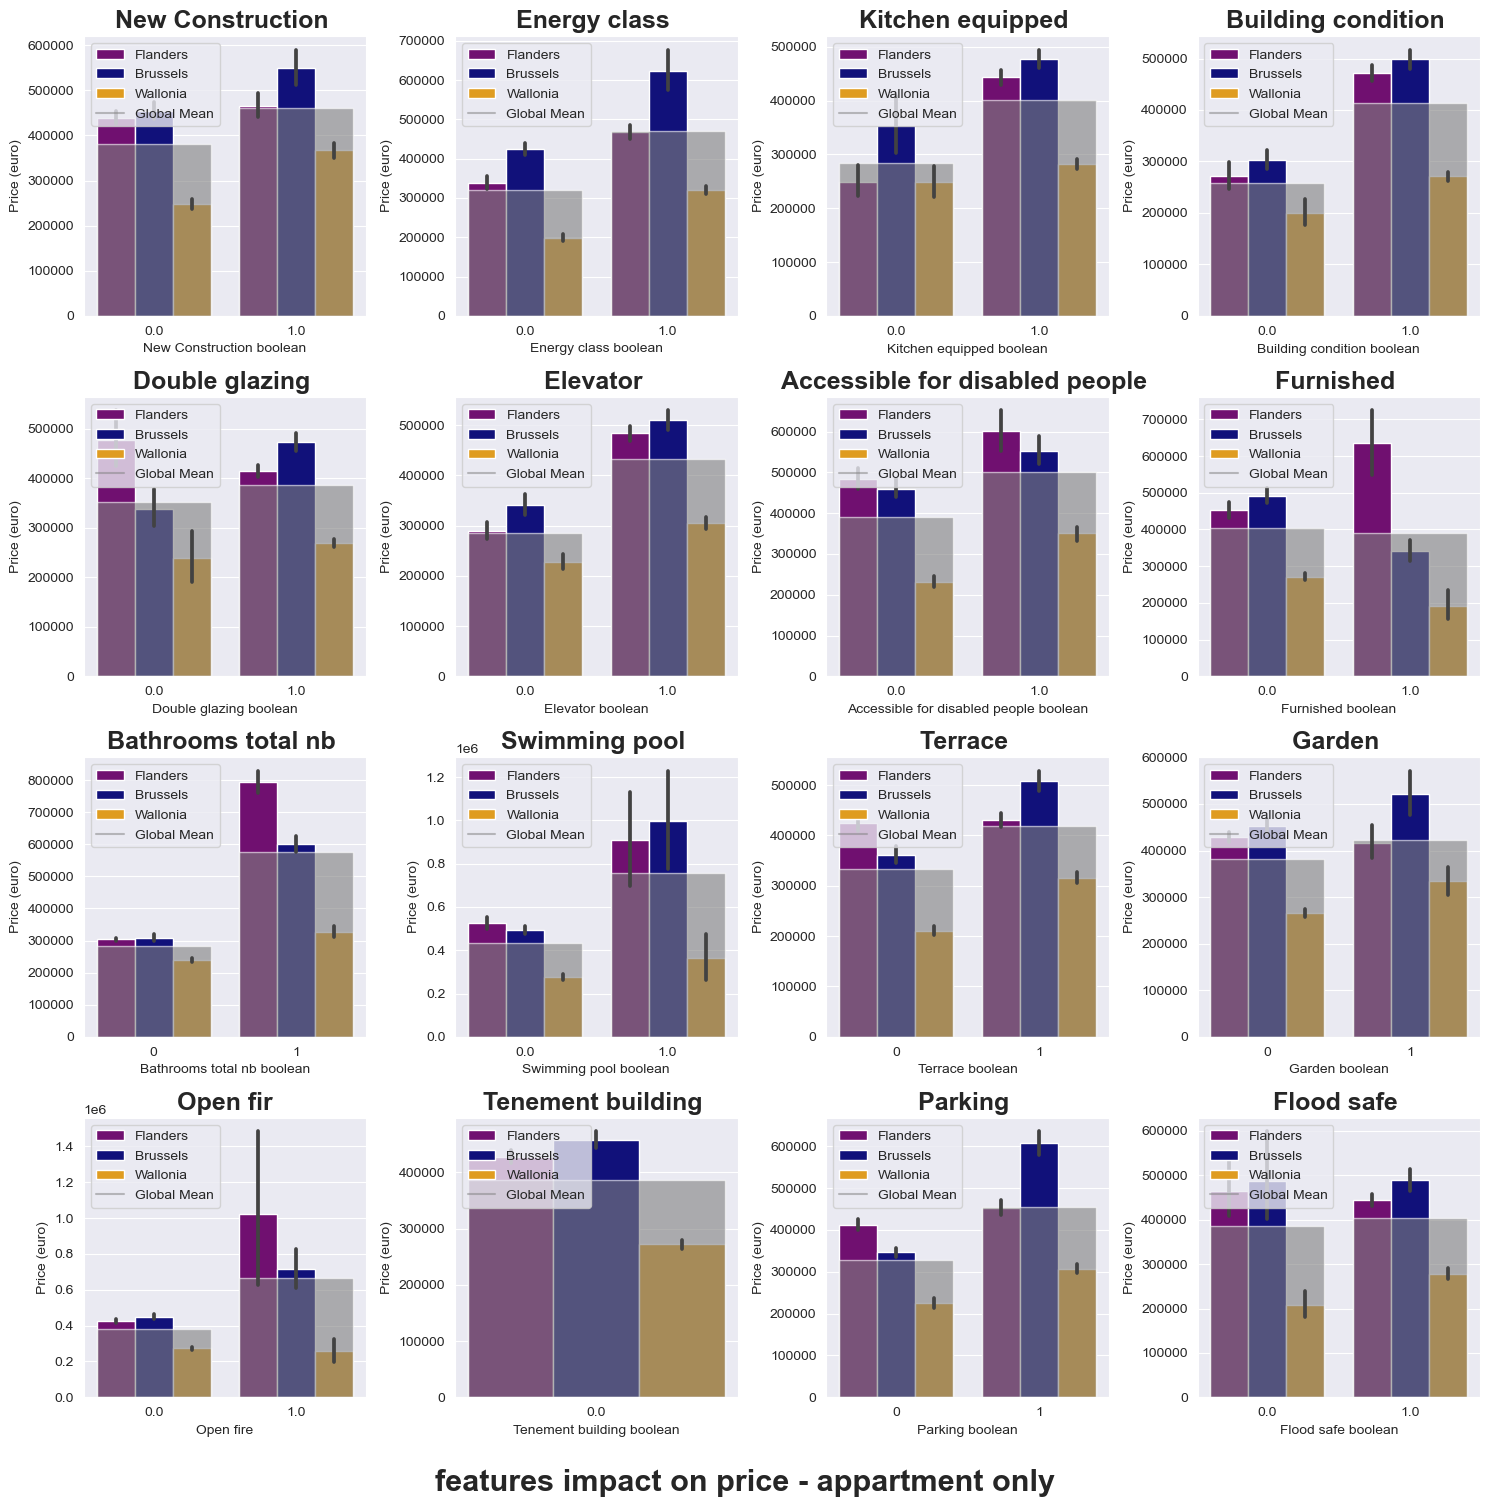

In [ ]:
# All Feature impact on aptmt property

apartment_df = df[df['Type of property'] == 'Apartment']

fig, axes = plt.subplots(4,4 , figsize=(15, 15))
custom_palette = {'Flanders': 'purple', 'Wallonia': 'orange', 'Brussels': 'darkblue'}

# Flatten to an np array to allow iteration
axes = axes.flatten()

variables = ['New Construction boolean','Energy class boolean', 'Kitchen equipped boolean', 'Building condition boolean', 'Double glazing boolean', 'Elevator boolean', 'Accessible for disabled people boolean', 'Furnished boolean', 'Bathrooms total nb boolean', 'Swimming pool boolean', 'Terrace boolean', 'Garden boolean', 'Open fire', 'Tenement building boolean', 'Parking boolean', 'Flood safe boolean']

# Iterate over each variable 
for i, variable in enumerate(variables):
    if i < len(variables):  # Ensure you don't exceed the number of variables
        sns.barplot(x=variable, y='Price (euro)', data=apartment_df, hue="region", ax=axes[i], palette = custom_palette)
        axes[i].set_title (f'{variable.rstrip("boolean")}', fontsize=18)


        # Calculate the mean price for each boolean status across all provinces
        boolean_price_means = apartment_df.groupby([variable, 'region'])['Price (euro)'].mean().reset_index()
        total_price_means = boolean_price_means.groupby(variable)['Price (euro)'].mean()

        # Plot total mean bars
        for idx, (status, mean_price) in enumerate(total_price_means.items()):
            axes[i].bar(idx, mean_price, color='grey', alpha=0.6)  # Gray bars for total mean
            global_means.append(mean_price)  # Add the mean price to the global means list

        # Add a dummy plot for the global mean to get its handle and label
        global_mean_handle, = axes[i].plot([], [], color='gray', alpha=0.5)

        # Get handles and labels from the subplot legend
        handles, labels = axes[i].get_legend_handles_labels()

        # Add the handle and label for the global mean to the legend
        handles.append(global_mean_handle)
        labels.append('Global Mean')

        # Add the legend to the subplot
        axes[i].legend(handles, labels, loc='upper left')


#print title
figtext_kwargs = {'x': 0.5, 'y': -0.03 , 'ha': 'center', 'va': 'bottom', 'fontsize': 22, 'fontweight':'bold'}
fig.suptitle('features impact on price - appartment only', **figtext_kwargs)

# Adjust layout to prevent overlap of titles
plt.tight_layout()

# Show the plot
plt.show()


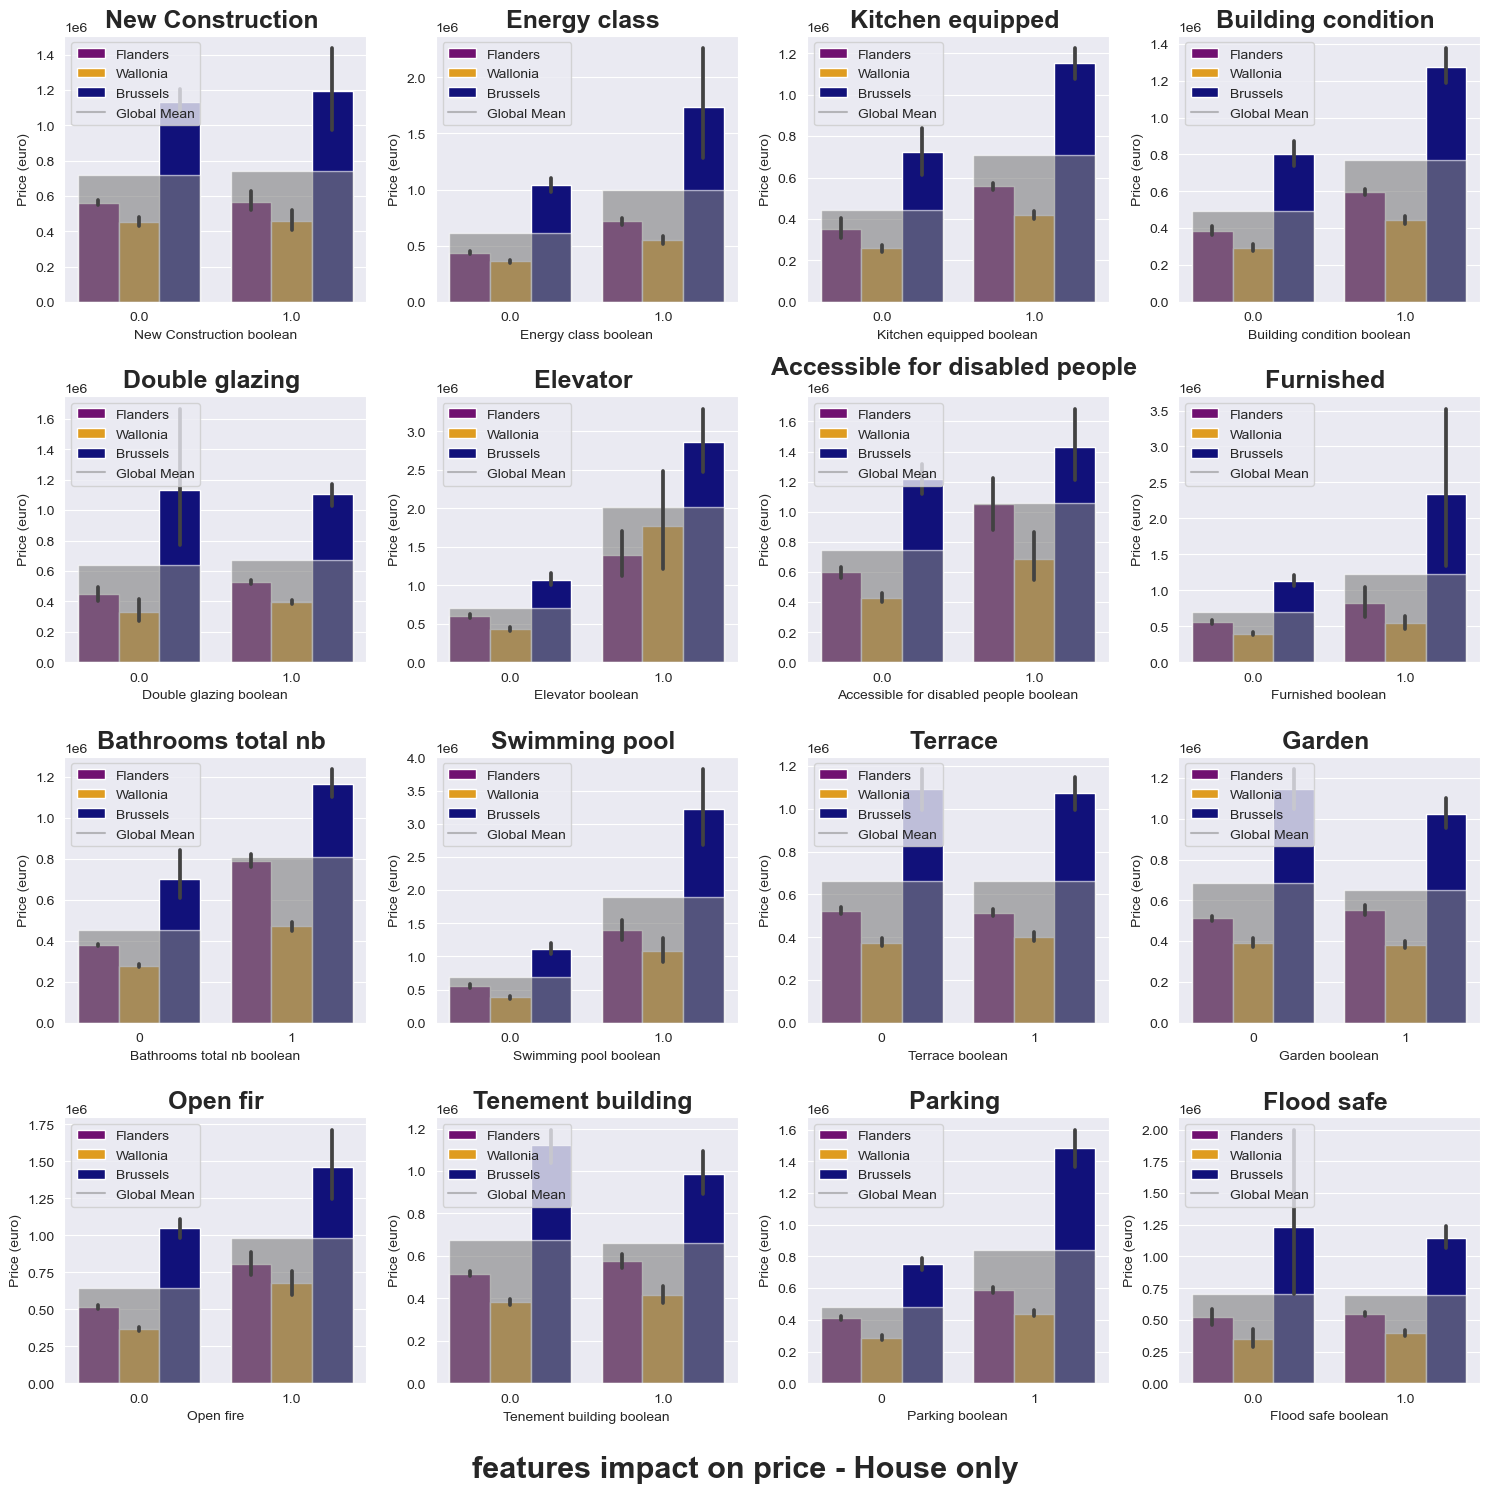

In [ ]:
# All Feature impact on houses property

apartment_df = df[df['Type of property'] == 'House']

fig, axes = plt.subplots(4,4 , figsize=(15, 15))
custom_palette = {'Flanders': 'purple', 'Wallonia': 'orange', 'Brussels': 'darkblue'}

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define the variables for each subplot
variables = ['New Construction boolean','Energy class boolean', 'Kitchen equipped boolean', 'Building condition boolean', 'Double glazing boolean', 'Elevator boolean', 'Accessible for disabled people boolean', 'Furnished boolean', 'Bathrooms total nb boolean', 'Swimming pool boolean', 'Terrace boolean', 'Garden boolean', 'Open fire', 'Tenement building boolean', 'Parking boolean', 'Flood safe boolean']

# Iterate over each variable 
for i, variable in enumerate(variables):
    if i < len(variables):  # Ensure you don't exceed the number of variables
        sns.barplot(x=variable, y='Price (euro)', data=apartment_df, hue="region", ax=axes[i], palette = custom_palette)
        axes[i].set_title (f'{variable.rstrip("boolean")}', fontsize=18)


        # Calculate the mean price for each boolean status across all provinces
        boolean_price_means = apartment_df.groupby([variable, 'region'])['Price (euro)'].mean().reset_index()
        total_price_means = boolean_price_means.groupby(variable)['Price (euro)'].mean()

        # Plot total mean bars
        for idx, (status, mean_price) in enumerate(total_price_means.items()):
            axes[i].bar(idx, mean_price, color='grey', alpha=0.6)  # Gray bars for total mean
            global_means.append(mean_price)  # Add the mean price to the global means list

        # Add a dummy plot for the global mean to get its handle and label
        global_mean_handle, = axes[i].plot([], [], color='gray', alpha=0.5)

        # Get handles and labels from the subplot legend
        handles, labels = axes[i].get_legend_handles_labels()

        # Add the handle and label for the global mean to the legend
        handles.append(global_mean_handle)
        labels.append('Global Mean')

        # Add the legend to the subplot
        axes[i].legend(handles, labels, loc='upper left')


#print title
figtext_kwargs = {'x': 0.5, 'y': -0.03 , 'ha': 'center', 'va': 'bottom', 'fontsize': 22, 'fontweight':'bold'}
fig.suptitle('features impact on price - House only', **figtext_kwargs)

# Adjust layout to prevent overlap of titles
plt.tight_layout()

# Show the plot
plt.show()


c:\Users\SL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Price Distribution by Segment')

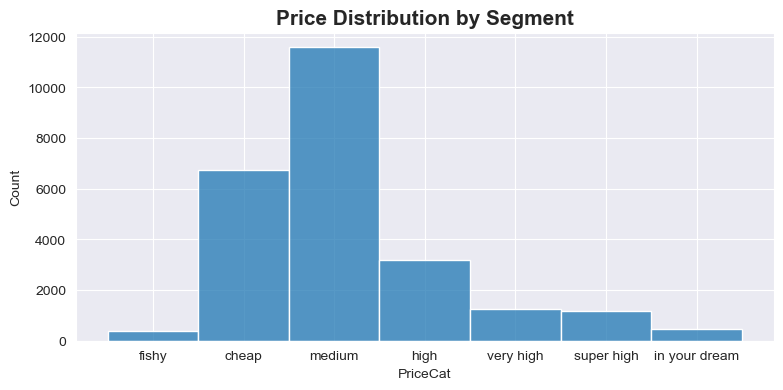

In [ ]:
# Price distribution by segment of price
PriceCat = pd.cut(df['Price (euro)'], bins=[0, 100000, 250000, 500000, 750000, 1000000, 2000000, 15000000], labels=['fishy', 'cheap', 'medium', 'high', 'very high', 'super high', 'in your dream'])
df['PriceCat'] = PriceCat
sns.histplot(df['PriceCat'])

#print title
plt.title('Price Distribution by Segment')

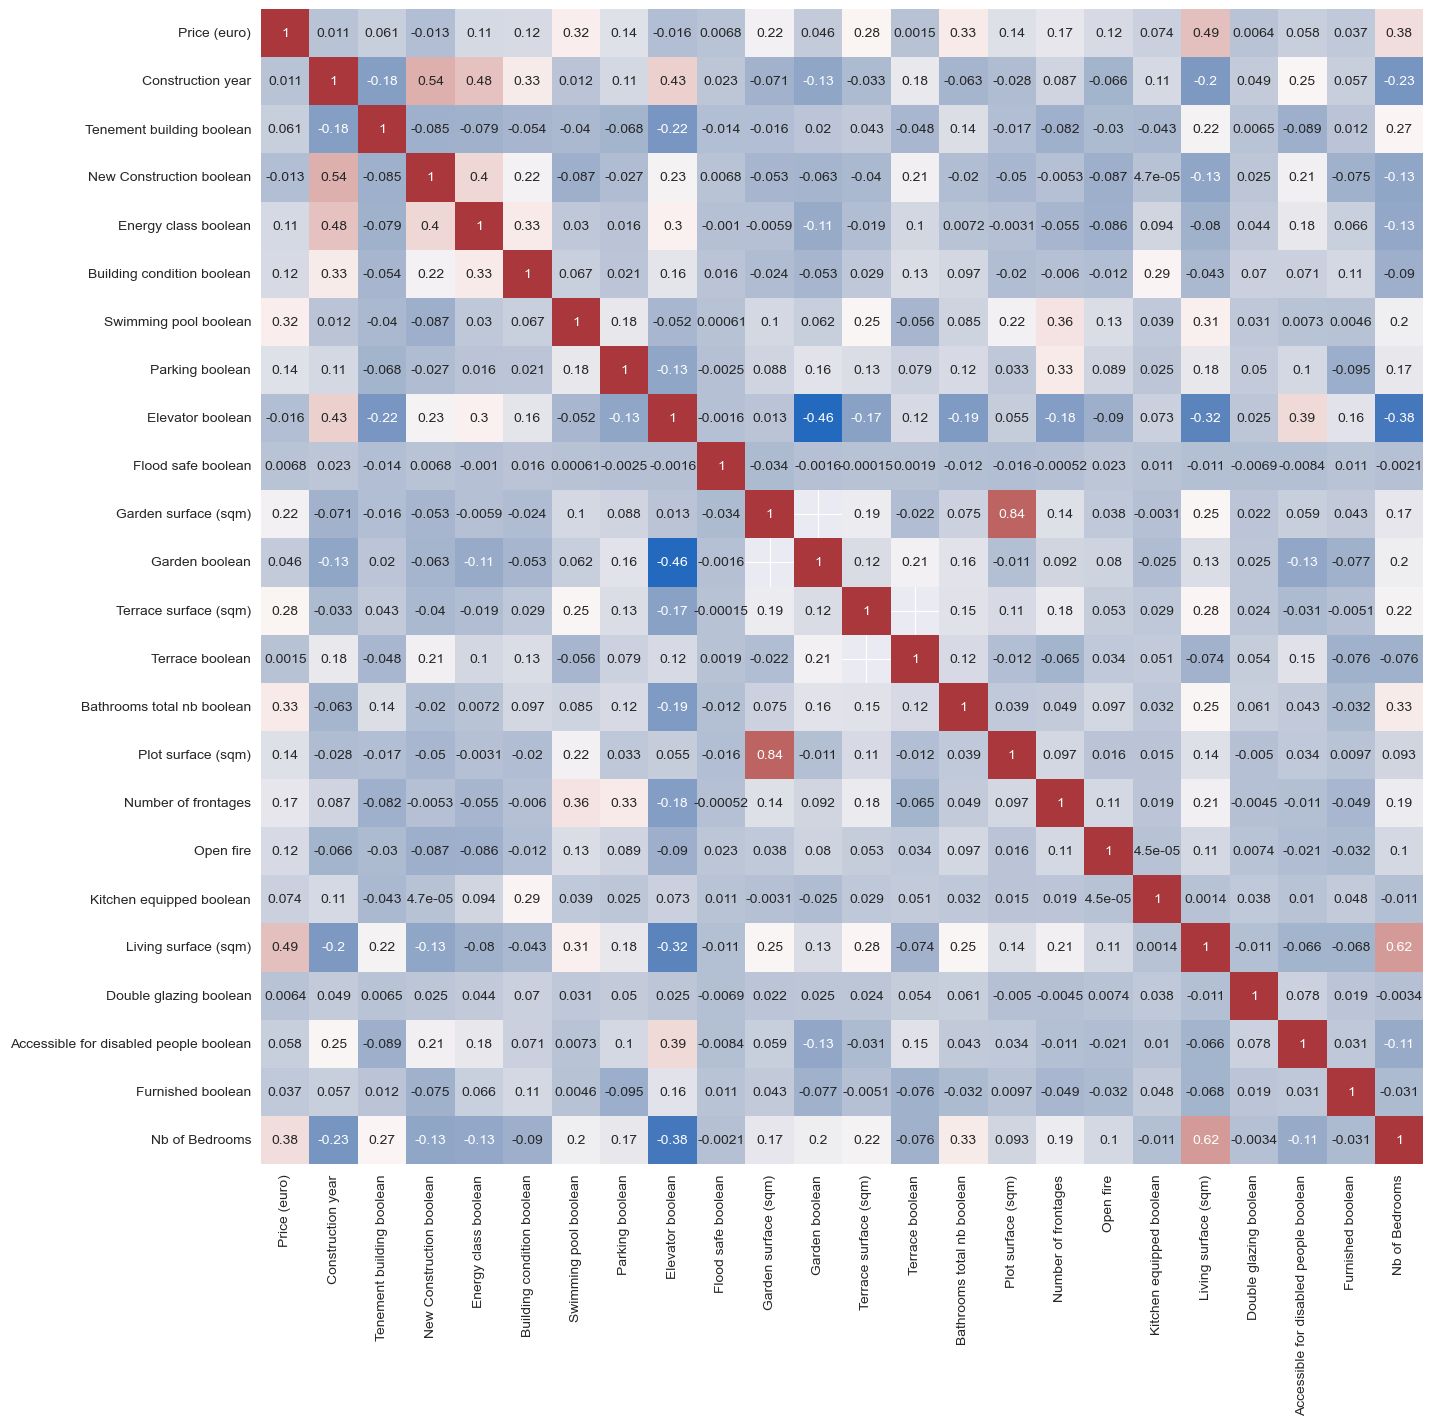

In [9]:
# Correlation matrix on quanti features

qty_var = df[['Price (euro)', 'Construction year', 'Tenement building boolean','New Construction boolean','Energy class boolean' ,'Building condition boolean', 'Swimming pool boolean', 'Parking boolean', 'Elevator boolean', 'Flood safe boolean' ,'Garden surface (sqm)', 'Garden boolean','Terrace surface (sqm)','Terrace boolean','Bathrooms total nb boolean', 'Plot surface (sqm)','Number of frontages', 'Open fire', 'Kitchen equipped boolean' ,'Living surface (sqm)','Double glazing boolean','Accessible for disabled people boolean','Furnished boolean', 'Nb of Bedrooms' ]]
#float_col = data.select_dtypes('float').columns

plt.figure(figsize=(15, 15))
sns.heatmap(qty_var.corr(), annot=True, cbar=False, cmap='vlag')
plt.show()


<Axes: xlabel='Energy class', ylabel='Price (euro)'>

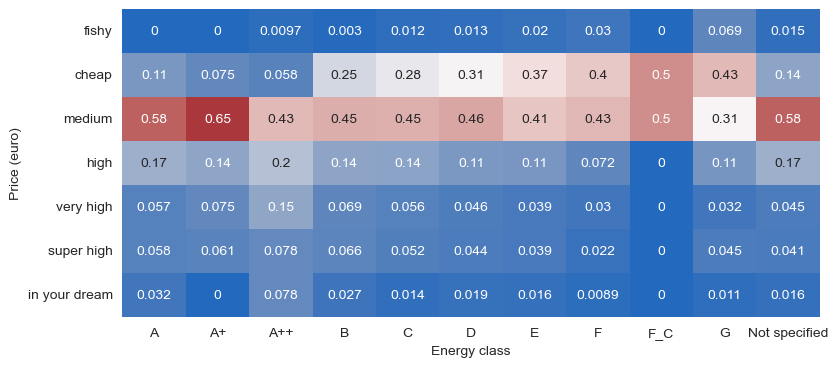

In [ ]:
# ross tab for qual parameters 
cross = pd.crosstab(PriceCat, df['Energy class'], normalize ='columns')
sns.heatmap(cross, annot=True, cbar = False, cmap = 'vlag')

In [ ]:
# map drawing attempt not working because the SHP file do not have the postal code to merge on. New approach taken with Maarteen using simple sns scatter plot + external postcode to coordinate source in the merge
import geopandas as gpd
import numpy as np

# Load the shapefile of Belgium's postal code boundaries
belgium_postal_codes = gpd.read_file('georef-belgium-postal-codes.shp')
print(type(belgium_postal_codes))
print(belgium_postal_codes)
print(belgium_postal_codes.columns)
average_price_per_postal_code = df.groupby('Postal code')['Price (euro)'].mean()
belgium_postal_codes.to_csv('bpd.csv', index=False)    

#belgium_postal_codes = belgium_postal_codes.merge(average_price_per_postal_code, on='geometry')

""" Plot the heatmap
fig, ax = plt.subplots(figsize=(10, 10))
belgium_postal_codes.plot(column='Price (euro)', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Average Price per Postal Code in Belgium')
plt.show()"""

<class 'geopandas.geodataframe.GeoDataFrame'>
                                               geometry
0     POLYGON ((4.98786 50.13467, 4.98492 50.13449, ...
1     POLYGON ((4.82442 50.53793, 4.82531 50.53600, ...
2     POLYGON ((4.82346 50.17948, 4.82350 50.18117, ...
3     POLYGON ((5.30093 51.10579, 5.30611 51.10279, ...
4     POLYGON ((5.18388 51.07702, 5.18755 51.07817, ...
...                                                 ...
1226  POLYGON ((4.36834 50.91557, 4.36817 50.91493, ...
1227  POLYGON ((4.48987 50.90178, 4.49222 50.89702, ...
1228  POLYGON ((4.66325 50.79316, 4.65992 50.79324, ...
1229  POLYGON ((4.15739 50.86320, 4.15847 50.86533, ...
1230  POLYGON ((4.95744 50.90121, 4.95682 50.90048, ...

[1231 rows x 1 columns]
Index(['geometry'], dtype='object')


" Plot the heatmap\nfig, ax = plt.subplots(figsize=(10, 10))\nbelgium_postal_codes.plot(column='Price (euro)', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)\nplt.title('Average Price per Postal Code in Belgium')\nplt.show()"

Axes(0.125,0.11;0.775x0.77)


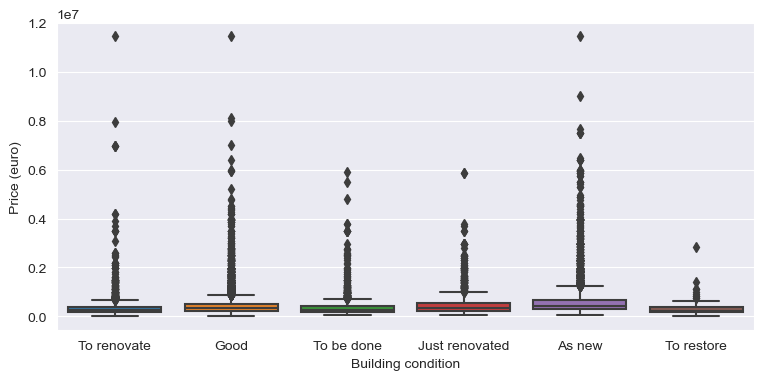

In [ ]:
# examples of outliers cross price
print(sns.boxplot(data=df, y='Price (euro)', x='Building condition'))


Axes(0.125,0.11;0.775x0.77)


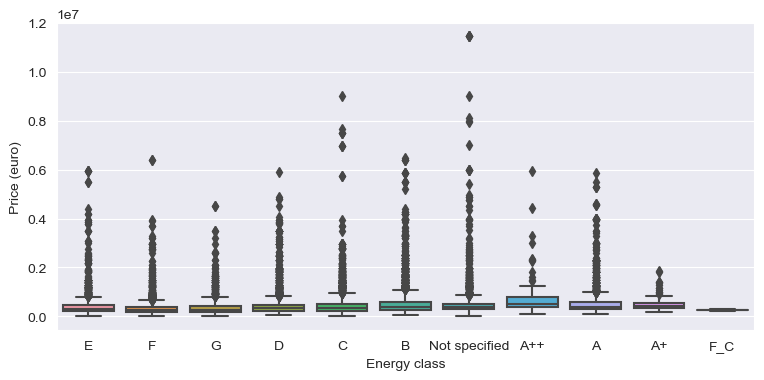

In [ ]:
# examples of outliers cross price
print(sns.boxplot(data=df, y='Price (euro)', x='Energy class'))


